In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
pylab.rcParams['figure.figsize'] = (4.0, 2.)
pylab.rcParams['lines.linewidth'] = 1.0
pylab.rcParams['font.size'] = 12.0
pylab.rcParams['axes.linewidth'] = 1
pylab.rcParams['axes.titlesize'] = '14' 
pylab.rcParams['axes.labelsize'] = '10'
pylab.rcParams['axes.linewidth'] = 1
pylab.rcParams['figure.subplot.wspace'] = 0.5

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm
from sklearn import mixture
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
import itertools
from scipy import linalg
import matplotlib as mpl
import h5py

from detect import detectData
from localisation import localisation, amps, filteredSpikes

Populating the interactive namespace from numpy and matplotlib


In [2]:
data_path = '/Users/josh/Project/data/rawDataSampleLarge.h5'
data = h5py.File(data_path, 'r')


In [ ]:
# detectData(d, rawfilename, sfd, nDumpFrames, thres, maa = None, maxsl = None, minsl = None, ahpthr = None):

# MinAvgAmp minimal avg. amplitude of peak (in units of Qd)
# MaxSl dead time in frames after peak, used for further testing
# MinSl length considered for determining avg. spike amplitude
# AHPthr signal should go below that threshold within MaxSl-Slmin frames
# def detectData(data, spikefilename, shapefilename, sfd, thres, maa = None, maxsl = None, minsl = None, ahpthr = None):

# Matthias was using threshold 8
detectData(data_path, 'spikes', 'shapes', 30000, 11, maa=0, maxsl=12, minsl=3, ahpthr=0)
# detectData(data_path, 'spikes', 'shapes', 30000, 8)

(385, 1800000)
# Sampling rate: 30000
# Number of recorded channels: 385
# Analysing frames: 1800000, Seconds:60
Analysing 50000 frames; -22 50009
t0 = 0, t1 = 50000
(385, 50009)
Analysing 50000 frames; 49978 100009
t0 = 50000, t1 = 100000
(385, 50031)
Analysing 50000 frames; 99978 150009
t0 = 100000, t1 = 150000
(385, 50031)
Analysing 50000 frames; 149978 200009
t0 = 150000, t1 = 200000
(385, 50031)
Analysing 50000 frames; 199978 250009
t0 = 200000, t1 = 250000
(385, 50031)
Analysing 50000 frames; 249978 300009
t0 = 250000, t1 = 300000
(385, 50031)

(1425406, 3)


<IPython.core.display.Javascript object>


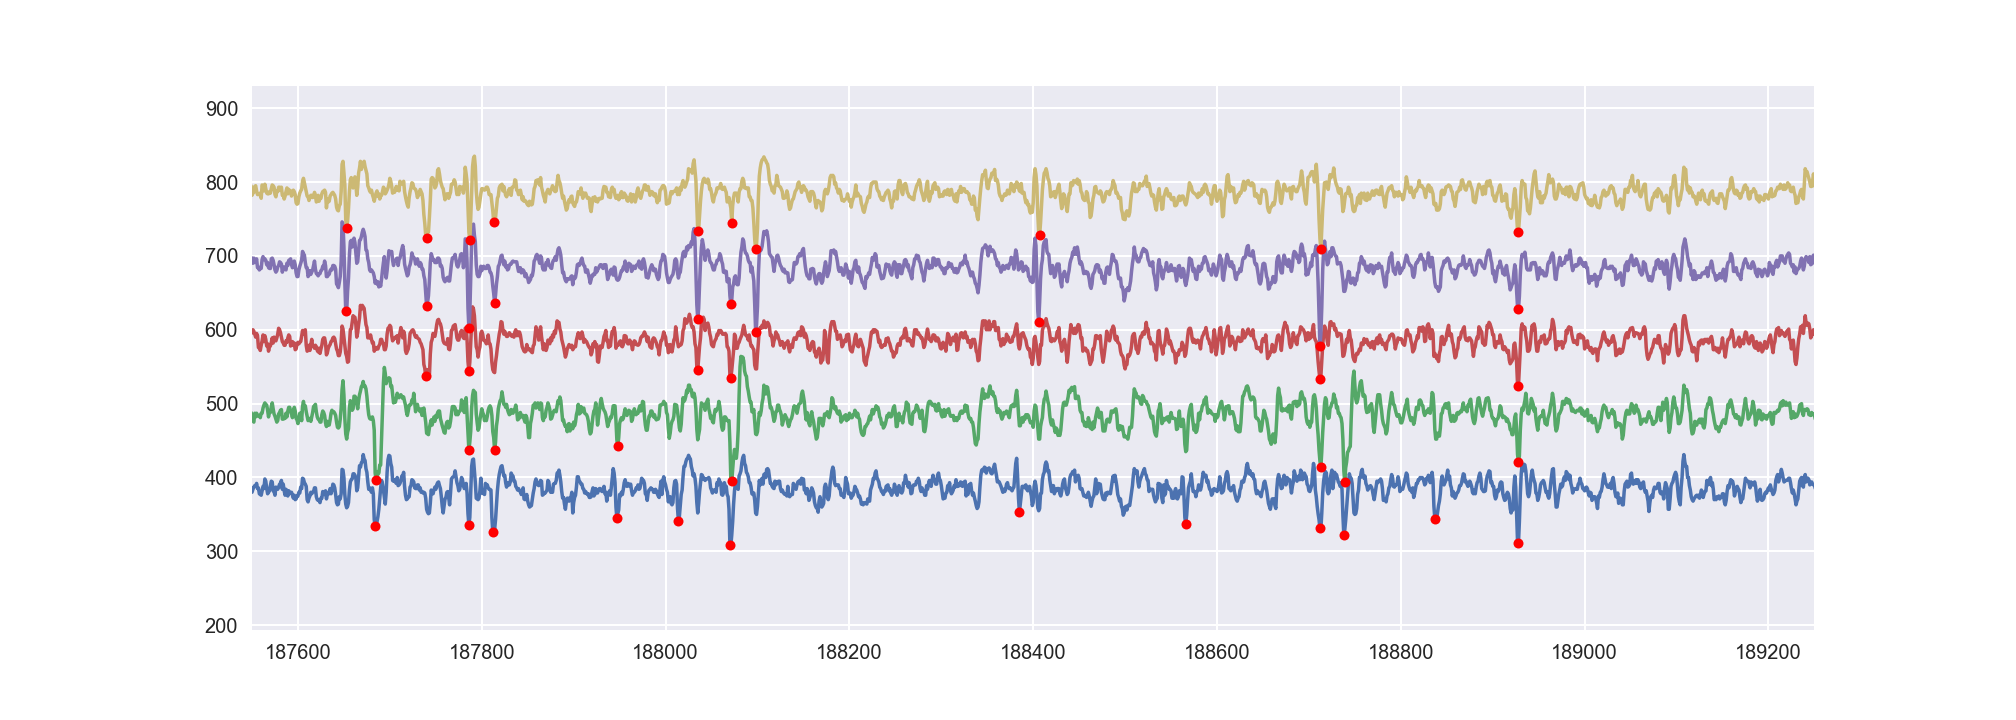

(187550, 189250)

In [4]:
%matplotlib notebook
sp = np.loadtxt('spikes')
print(sp.shape)
plt.figure(figsize=(14,5))
for i, channel in enumerate(range(0,5)):
    d = data['Raw'][channel,:]
    plt.plot(d+i*100)
    inds = np.where(sp[:,0]==channel)[0]
    plt.plot(sp[inds,1], d[sp[inds,1].astype(int)]+i*100,'r.',ms=10)
plt.xlim((187550,189250))

In [5]:
# plot individual shapes, remove baseline (now stored in shape file at position 4)

In [5]:
f = open('shapes')

In [6]:
l = f.readline()
line = l.split()
ch = int(line[0])
frame = int(line[1])
amp = int(line[2])
b = int(line[3])
cutout = np.array(line[4:], dtype=int)
ch, frame, amp, len(cutout)/10, b

(1, 25, 385, 19, 385)

<IPython.core.display.Javascript object>


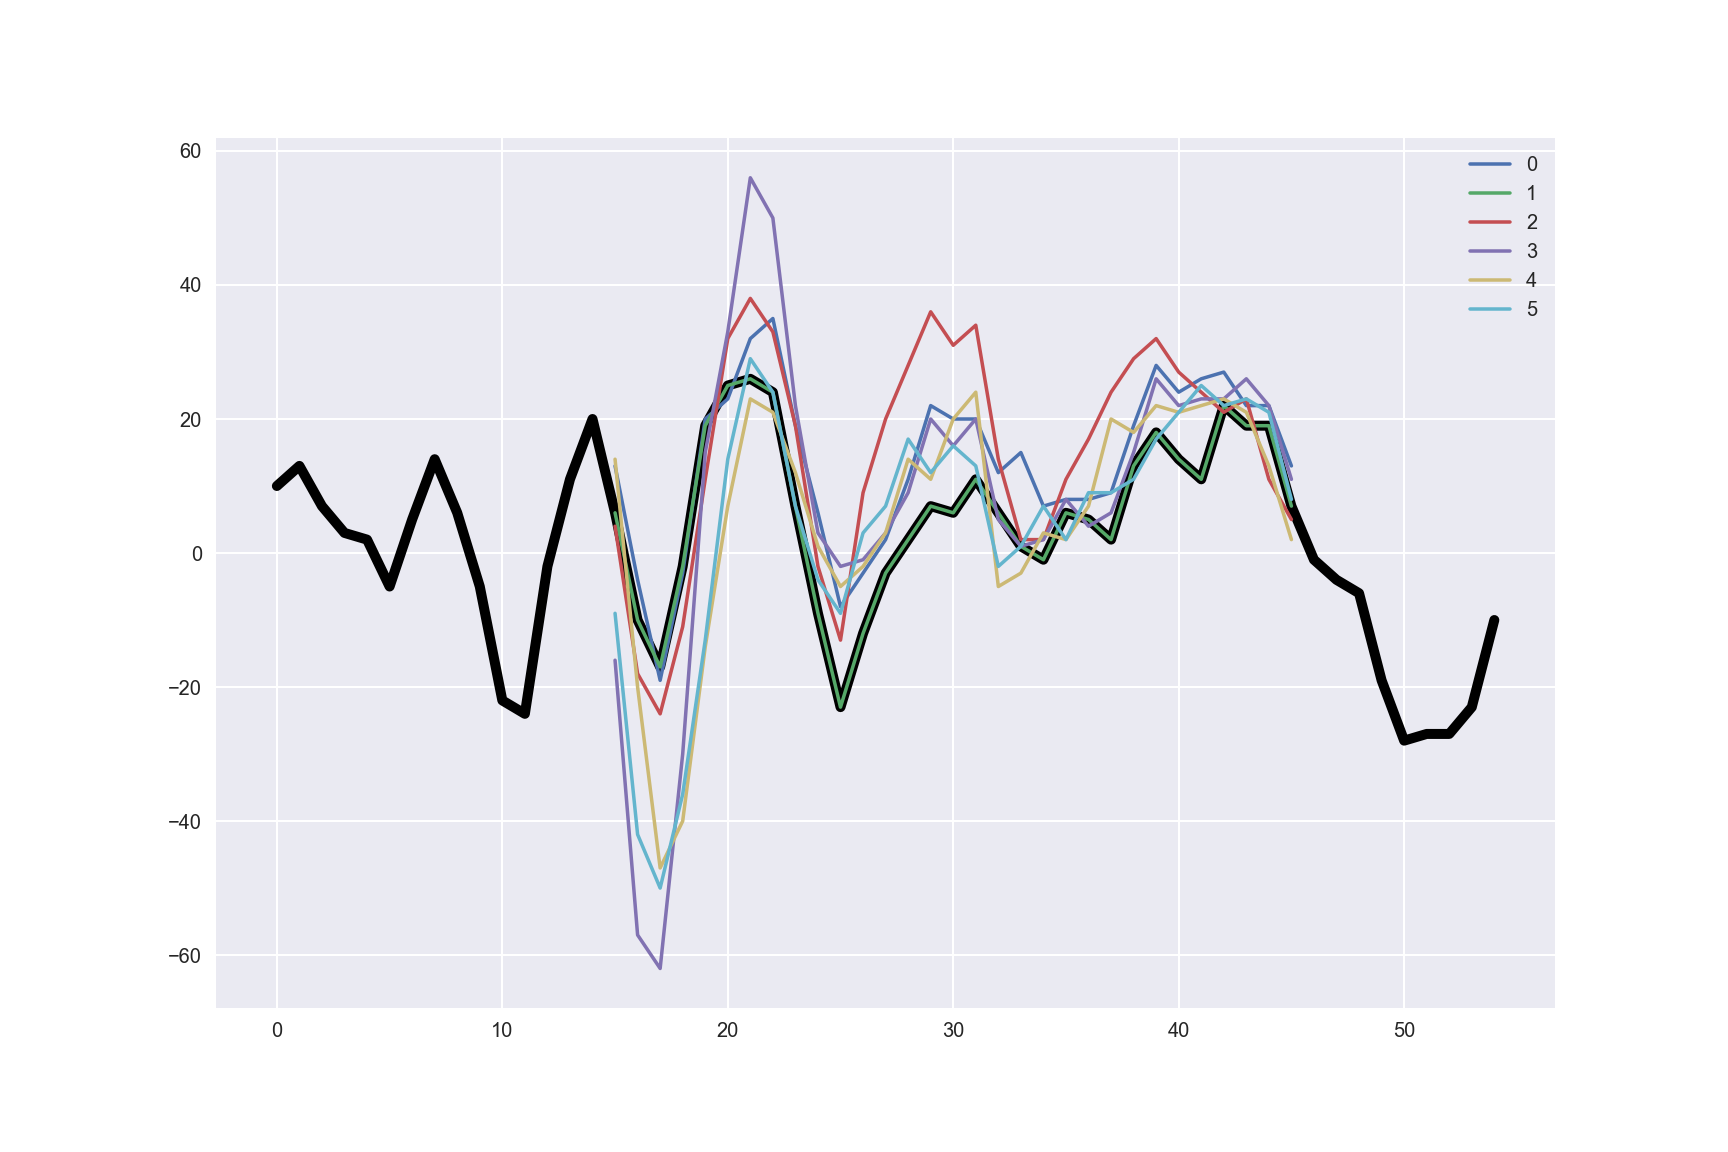

In [7]:
plt.figure(figsize=(12,8))
d = data['Raw'][ch,:]
plt.plot(d[:frame+30]-b, 'k', lw=5)
for i in range(int(len(cutout)/32)):
    plt.plot(np.arange(frame-10, frame+21), cutout[i*32+1:(i+1)*32]-b, label=cutout[i*32])
plt.legend()

In [8]:
filteredSpikes('shapes')

Number of filtered spikes = 662810


In [2]:
localisation('filtered_shapes','chpos.npy', medians = True, clen = 32)

Broken line = 42345
[88.0, 385.0, 392.0, 382.0, 378.0, 385.0, 380.0, 380.0, 383.0, 371.0, 369.0, 370.0, 369.0, 377.0, 374.0, 370.0, 374.0, 375.0, 383.0, 384.0, 388.0, 390.0, 395.0, 395.0, 398.0, 404.0, 407.0, 402.0, 387.0, 383.0, 388.0, 385.0, 89.0, 394.0, 397.0, 395.0, 391.0, 387.0, 387.0, 389.0, 387.0, 379.0, 373.0, 371.0, 381.0, 380.0, 375.0, 373.0, 377.0, 381.0, 388.0, 395.0, 401.0, 401.0, 398.0, 397.0, 397.0, 399.0, 397.0, 397.0, 390.0, 380.0, 388.0, 387.0, 90.0, 395.0, 389.0, 393.0, 395.0, 390.0, 381.0, 380.0, 377.0, 371.0, 368.0, 362.0, 364.0, 378.0, 379.0, 378.0, 379.0, 387.0, 386.0, 400.0, 393.0, 395.0, 389.0, 388.0, 392.0, 395.0, 400.0, 392.0, 386.0, 380.0, 386.0, 380.0, 91.0, 390.0, 393.0, 391.0, 384.0, 385.0, 378.0, 384.0, 369.0, 369.0, 364.0, 362.0, 370.0, 380.0, 376.0, 374.0, 378.0, 384.0, 385.0, 390.0, 399.0, 391.0, 396.0, 393.0, 392.0, 398.0, 402.0, 399.0, 399.0, 391.0, 388.0, 382.0, 92.0, 395.0, 400.0, 390.0, 386.0, 385.0, 385.0, 378.0, 380.0, 371.0, 366.0, 363.0, 362.

In [3]:
ls = np.loadtxt('local_spikes')
ls.shape

(662808, 2)

<IPython.core.display.Javascript object>


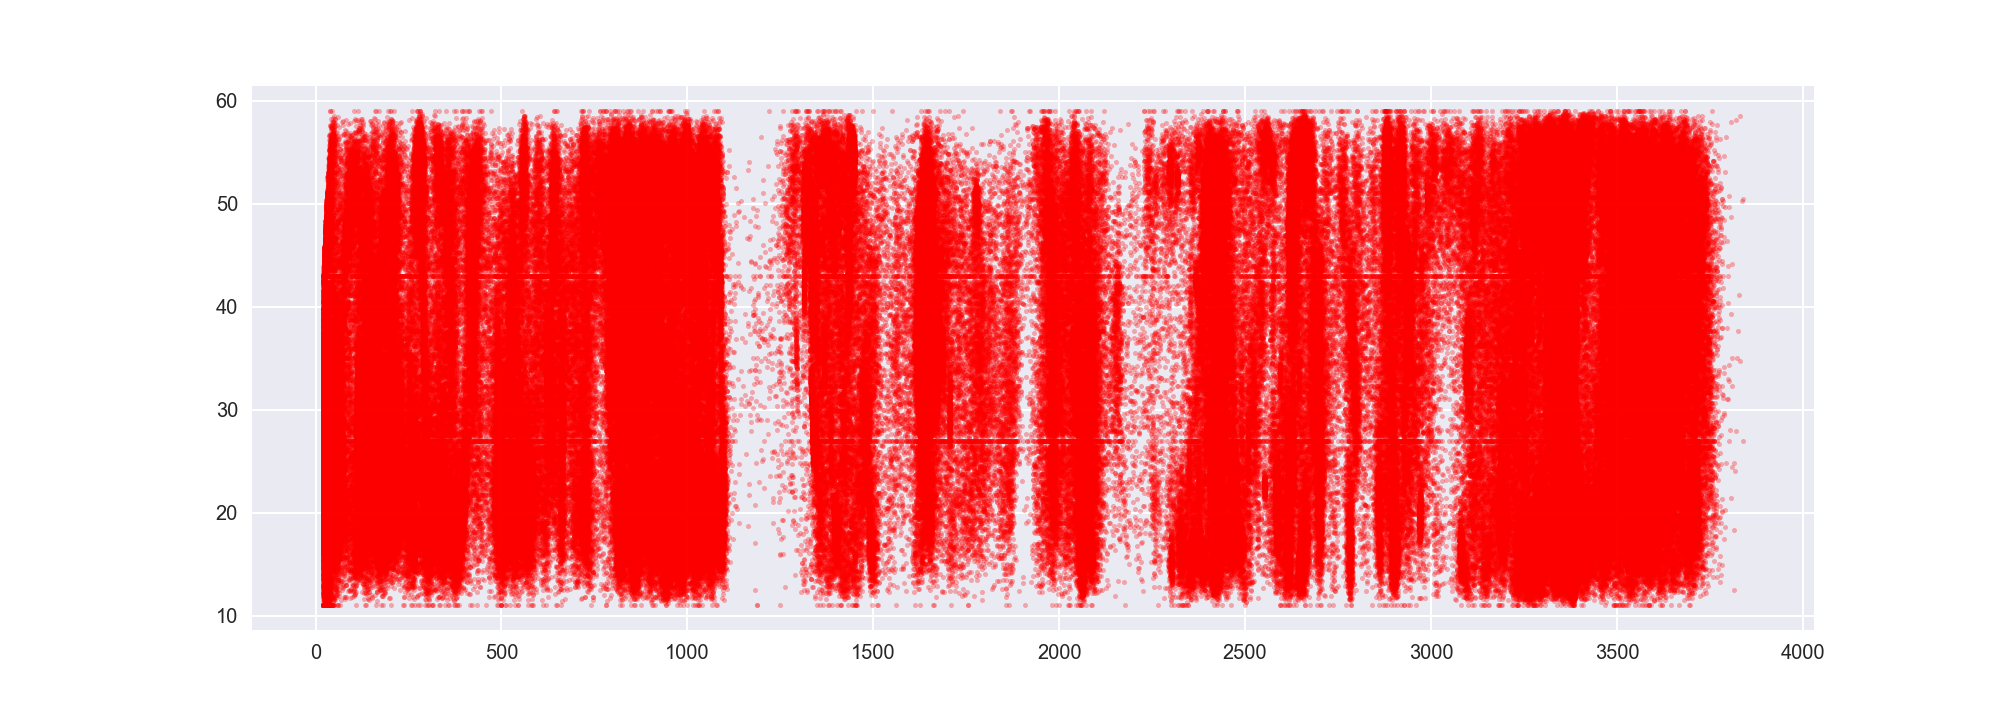

In [4]:
%matplotlib notebook
plt.figure(figsize=(14,5))
plt.plot(ls[:,0], ls[:,1],'r.',ms=5, alpha=0.3)

<IPython.core.display.Javascript object>


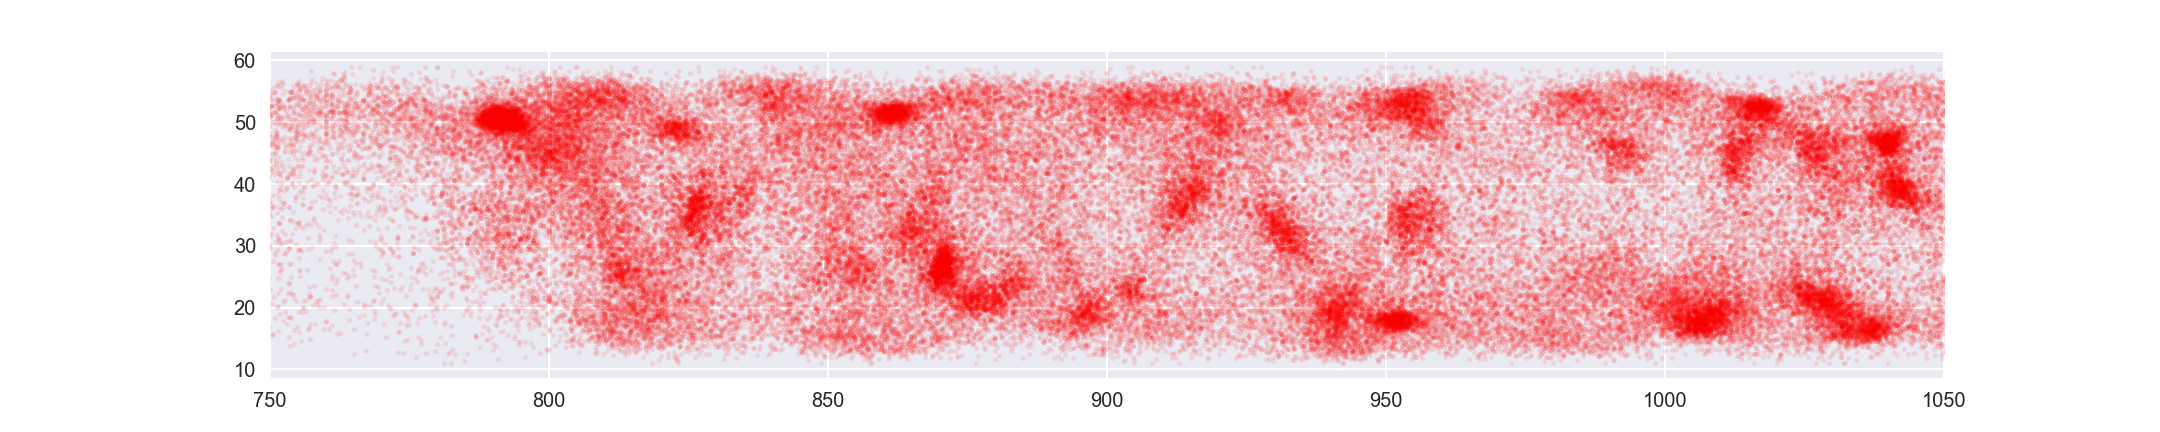

(750, 1050)

In [5]:
%matplotlib notebook
plt.figure(figsize=(15,3))
plt.plot(ls[:,0], ls[:,1],'r.',ms=5, alpha=0.1)
plt.xlim([750,1050])

<IPython.core.display.Javascript object>


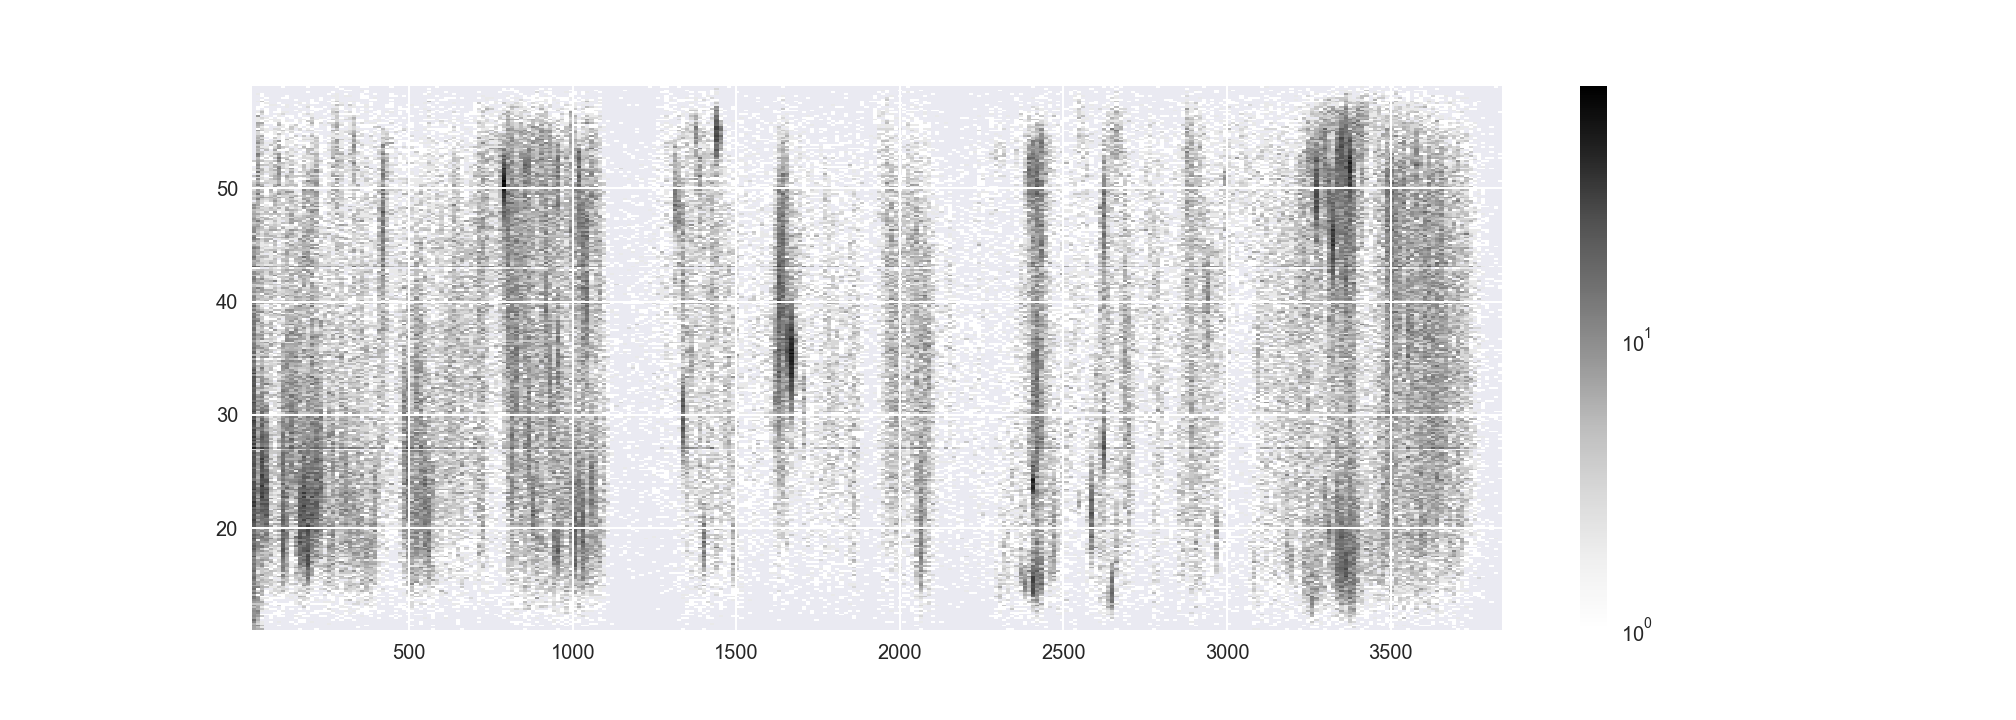

In [12]:
%matplotlib notebook
plt.figure(figsize=(14,5))
plt.hist2d(ls[:,0], ls[:,1], bins=300, norm=LogNorm())
plt.colorbar()

In [14]:
n = len(ls)

In [6]:
ms = MeanShift(bandwidth = 8, bin_seeding=True, min_bin_freq=10, n_jobs=-1)
ms.fit(ls)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

[[ 1670.49258396    35.58015475]
 [   22.55468638    26.01972463]
 [   49.97170743    24.52188837]
 [  792.13312037    50.04042435]
 [ 3374.70017728    51.0213594 ]
 [  173.97267813    21.92030685]
 [ 3323.4988247     45.06825332]
 [  195.40358638    20.17404636]
 [ 3271.63416681    51.06925042]
 [   63.71638853    23.90080404]
 [ 2411.69913819    18.62580763]
 [ 1633.7350018     42.55820819]
 [ 3344.38132414    18.61837887]
 [  119.42220649    20.7821234 ]
 [ 3357.6882418     52.58812052]
 [ 2426.9871489     47.48199512]
 [ 3384.11242127    17.09916037]
 [ 3345.37793678    52.08493469]
 [  871.35878625    25.898645  ]
 [ 2423.24738722    29.93339076]
 [ 1040.28541751    43.47747478]
 [ 1650.42061182    36.80244552]
 [ 2623.10625816    48.04846856]
 [  219.10427444    23.0191538 ]
 [ 1006.4049154     19.48435963]
 [  492.57241647    27.3965322 ]
 [ 1030.64273256    19.52652262]
 [ 3308.1802233     50.5188493 ]
 [  947.13730946    18.7098161 ]
 [ 3364.87000127    17.47922237]
 [  422.22

<IPython.core.display.Javascript object>


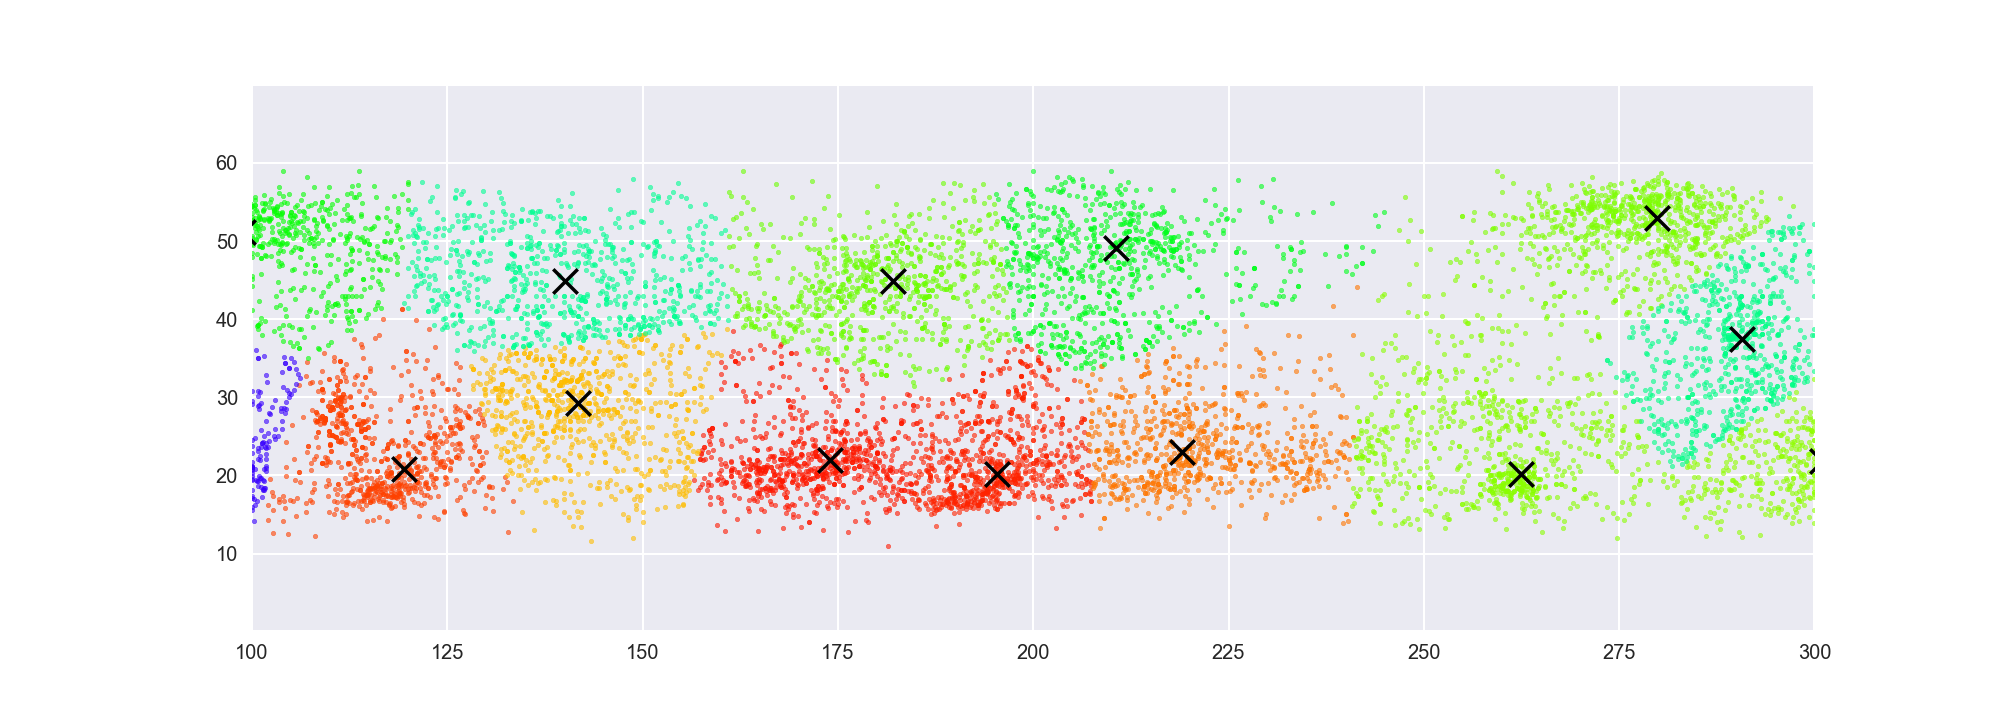

(100, 300)

In [7]:
plt.figure(figsize=(14,5))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.arange(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:800]
    plt.scatter(ls[inds,0], ls[inds,1], marker='.', color = colors[cl],s=20, alpha=0.6)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')
plt.xlim((100,300))


In [8]:
cutouts = np.loadtxt('pca_cutouts')

<IPython.core.display.Javascript object>


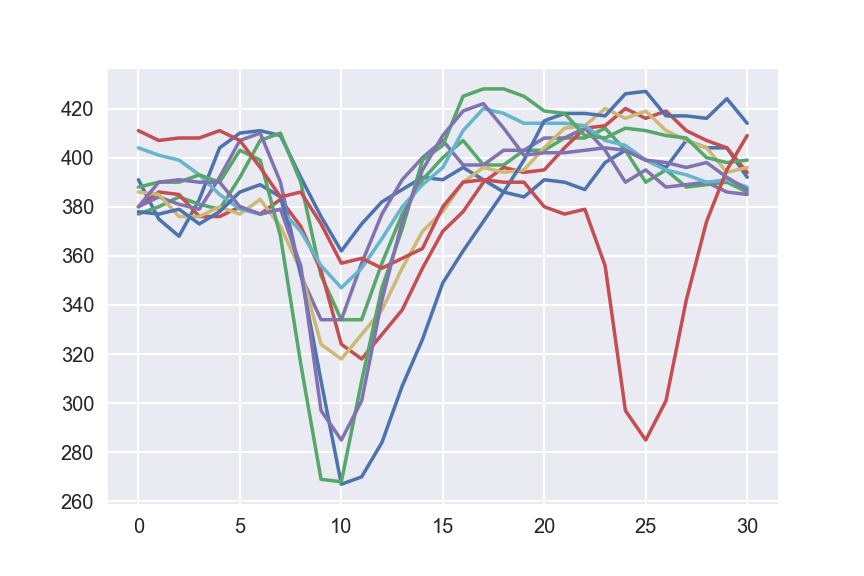

In [10]:
%matplotlib notebook
for i in range(10):
    plt.plot(np.arange(31), cutouts[i])

In [11]:
pca = PCA(n_components=2, whiten=True)
cutouts = pca.fit_transform(cutouts)

In [12]:
cutouts

array([[-0.63756197, -0.12712237],
       [ 0.09667007, -0.36229021],
       [ 0.89602229,  1.13779554],
       ..., 
       [-0.07147403, -0.18458003],
       [-0.65784432,  0.16675062],
       [-0.97922341,  0.34252268]])

In [13]:
# X = np.hstack((ls, cutouts))
# X
cutouts.shape

(662652, 2)

In [ ]:
ms = MeanShift(bandwidth = 8, bin_seeding=True, min_bin_freq=10, n_jobs=-1)
ms.fit(ls)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Number of estimated clusters:", n_clusters_)

In [ ]:
plt.figure(figsize=(14,5))
# colors = 100*['r', 'g', 'b', 'c', 'k', 'y', 'm']
colors = plt.cm.hsv(1.*np.arange(n_clusters_)/n_clusters_)

for cl in np.unique(labels):
    inds = np.where(labels==cl)[0][:800]
    plt.scatter(ls[inds,0], ls[inds,1], marker='.', color = colors[cl],s=20, alpha=0.6)

plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker="x", color ='k', s=150, linewidths = 5, zorder=10)
plt.axis('equal')
plt.xlim((100,300))